# Module 4 - Simple Harmonic Motion

<img src="http://i.imgur.com/l2WMuTN.gif">

## Goals

- Numerically solve the simple harmonic oscillator
- Solve 2nd order ODEs as coupled 1st order equations using Euler and Verlet methods

## The simple harmonic oscillator

A simple harmonic oscillator may be an object such as a block attached to a spring:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20230617224856/Linear-Simple-Harmonic-Motion.png" width=600px>

If the spring is stretched or compressed from their equilibrium position, then the spring will exert a restoring force, $\vec{F}$, which tries to bring the spring back to its equilibrium. In the absence of any friction, the mass on the spring will continuously stretch and compress the spring in a repeating manner. 

It is often useful for us to model molecules and materials as point particles (masses) connected by harmonic springs:

<img src="https://easyspin.org/455/_images/vib_displacement.png" width=400px>

Harmonic bonds are an essential component of modeling molecules in methods such as molecular dynamics simulations, which we'll explore in later modules. In this module, we will focus on solving numerically the equations of motion for a single simple harmonic oscillator.

## Equations of Motion

The restoring force acting on the mass $m$ is given by $F=-kx$, where $x$ is the displacement from the equilibrium position and $k$ is the spring constant (a material property of the spring). The negative sign in the force ensures that the restoring force always opposes the motion such that when the spring is stretched ($x>0$), then the force acts in the $-\hat{x}$ direction, and conversely when the spring is compressed ($x<0$), then the force acts in the $+\hat{x}$ direction.

We can combine the restoring force for the harmonic oscillator with Newton's second law, $F = ma$, to write a second order differential equation that describes its motion

\begin{align}
    ma &= -kx\\
    \\
    m\frac{d^2 x}{dt^2} &= -kx,
\end{align}

where we have use the relation that the acceleration of the object is given by the second derivative of the position with respect to time, $a=\frac{d^2 x}{dt^2}$.

The analytical solution to this differential equation is given by the equation

$$x(t) = B \cos (\omega t + \phi),$$

where $B$ is the amplitude of oscillation, $\omega$ is the angular frequency, and $\phi$ is the phase. These three quantities can be obtained from the initial displacement, $x_0$, initial velocity, $v_0$, $k$, and $m$ as follows:

\begin{align}
    \omega &= \sqrt{\frac{k}{m}}\\
    \\
    B &= \sqrt{x_0^2 + \frac{v_0^2}{\omega^2}}\\
    \\
    \phi &= \tan^-1 \left( -\frac{v_0}{\omega x_0} \right).
\end{align}

In the absence of an initial velocity, $v_0=0$, then $\phi=0$ and the amplitude of oscillation is $B=x_0$, which simplifies the equation of motion to

$$ x(t) = x_0 \cos (\omega t).$$

### Coupled 1st order differential equations

We can write the second order differential equation above as two 1st order ODEs that are coupled to each other by taking into consideration that we can write the acceleration as the first time derivative of the velocity, $a=\frac{dv}{dt}$, and the velocity as the first time derivative of the position, $v=\frac{dx}{dt}$. The equations of motion can therefore be written as

\begin{align}
    \frac{dv}{dt} &= -\frac{k}{m}x\\
    \\
    \frac{dx}{dt} &= v.
\end{align}

We can now use Euler's method to numerically solve the two first order equations. Keep in mind that the two equations must be solved **simultaneously**. This means that we must propagate both equations together at every time step. The analytical solution for the velocity as a function of time is

$$v(t) = -B\omega \sin(\omega t + \phi),$$

which simplifies to

$$v(t) = -x_0\omega \sin(\omega t)$$

when $v_0 = 0$.

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Before we begin programming our functions, take out a piece of paper and write down the iterative equations to find $x(t)$ and $v(t)$ using Euler's method. Remembers that Euler's method starts by approximating the derivative of a function using the forward difference equation:    

$$\frac{df(t)}{dt} \approx \frac{f(t+\Delta t) - f(t)}{\Delta t}.$$
    
Using this approximation, our two equations become
    
\begin{align}
    \frac{v(t+\Delta t) - v(t)}{\Delta t} &= -\frac{k}{m}x(t)\\
    \\
    \frac{x(t+\Delta t - x(t)}{\Delta t} &= v(t).
\end{align}

Solve for $v(t + \Delta t)$ and $x(t + \Delta t)$ in the equations above. Once you have done this, rewrite the two equations using the discretized notation assuming that we split time into uniform intervals of size $\Delta t$ such that $t_n = n\Delta t$, $x(t_n) = x_n$, and $v(t_n) = v_n$.

**Check with the instructor to make sure you have the right equations before proceeding to writing your functions.**
    
Now that you have the discretized equations, create a function called `Euler(x0, k, m, tmax, dt)`, which takes five inputs: `x0` - the initial displacement, `k` - the spring constant, `m` - the mass, `tmax` - the total time, and `dt` the time step. Assume that the initial velocity is 0, $v_0=0$. 
    
Your function should return 3 quantities as numpy arrays: 
<br/>
<br/>
    $t[n=0\dots N-1]$ - the time array,<br/>
    $x[n=0\dots N-1]$ - the positions array, and <br/>
    $v[n=0\dots N-1]$ - the velocities array,<br/>

where $N=t_\mathrm{max}/dt$.

Hints: Use the numpy/python magic!! Use the `np.arange` function to create the time array given that you know the starting time, the maximum time, and time interval. Store the positions and velocities at each time step using numpy arrays of the same size as the time array.
</div>

Text(0, 0.5, '$v(t)$ [m/s]')

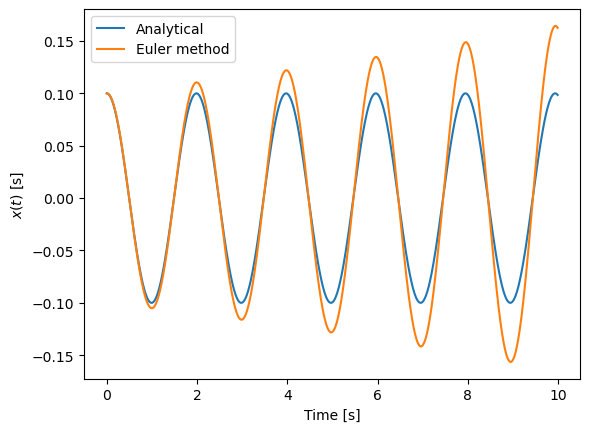

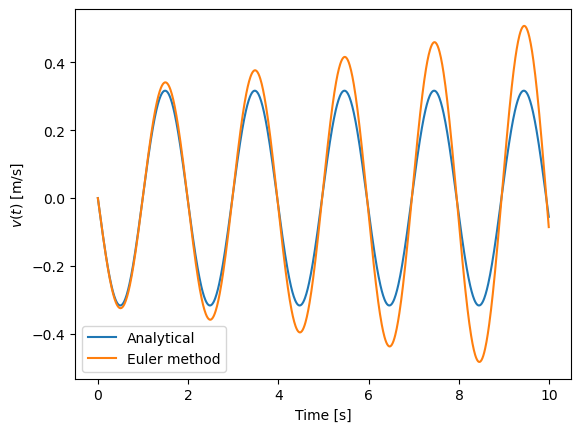

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def Euler(x0, k, m, tmax, dt):
## INSERT YOUR CODE HERE ##
    t = np.arange(0.0, tmax, dt)
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = x0
    
    for n in range(t.size-1):
        x[n+1] = x[n] + v[n]*dt
        v[n+1] = v[n] - (k/m)*x[n]*dt
    
    return t,x,v

# constants and intitial conditions
k = 1 # N/m
m = 0.1 # Kg
dt = 0.01 # s
tmax = 10 # s
x0 = 0.1 # m

t,x,v = Euler(x0, k, m, tmax, dt)

plt.figure()
# Position vs time compared to analytical solution
plt.plot(t, x0*np.cos(np.sqrt(k/m)*t), label='Analytical')
plt.plot(t, x, label='Euler method')
plt.xlabel('Time [s]')
plt.ylabel(r'$x(t)$ [s]')
plt.legend()

# Velocity vs time compared to analytical solution
plt.figure()
plt.plot(t, -x0*np.sqrt(k/m)*np.sin(np.sqrt(k/m)*t), label='Analytical')
plt.plot(t, v, label='Euler method')
plt.legend(loc='lower left')
plt.xlabel('Time [s]')
plt.ylabel(r'$v(t)$ [m/s]')

## What went wrong?

The oscillations are **growing** with time!  This is our first encounter with a numerical procedure that is **unstable**. Euler's method is inherently unstable for solving differential equations with oscillatory motion because the energy increases without bounds regardless of the size of $\Delta t$!

The total energy of the simple harmonic oscillator is given by the sum of the kinetic and potential energies:

\begin{align}
    E &= KE + PE\\
    \\
    E &= \frac{1}{2}mv^2 + \frac{1}{2}kx^2
\end{align}

Plot the energy of your numerical solution and see if it remains constant!

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
    Create a function called `energy(x,v,k,m)` which takes as input the positions (`x`, numpy array), velocities (`v`, numpy array), spring constant (`k`), and mass (`m`) and returns an array with the total energy of the harmonic oscillator over time. Make a plot of the energy as a function of time.
    Try executing your code using various values of `dt`, but keep the value of `tmax` the same. How does this affect the time stability?
</div>

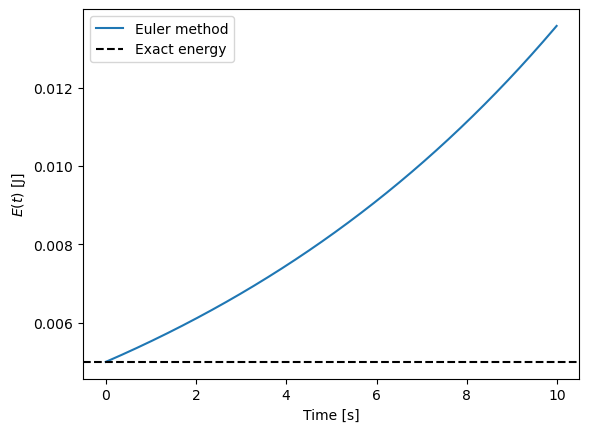

In [2]:
# constants and intitial conditions
k = 1 # N/m
m = 0.1 # Kg
dt = 0.01 # s
tmax = 10 # s
x0 = 0.1 # m

t,x,v = Euler(x0, k, m, tmax, dt)

## INSERT YOUR CODE HERE ##
def energy(x,v,k,m):
    return 0.5*k*x**2 + 0.5*m*v**2

plt.figure()
# Energy vs time - The total energy should be constant as it is a conserved quantity!
plt.plot(t, energy(x,v,k,m), label='Euler method')
plt.axhline(y=0.5*k*x0**2, color='k', ls='--', label='Exact energy')
plt.xlabel('Time [s]')
plt.ylabel(r'$E(t)$ [J]')
plt.legend()

## A simple fix - the Euler-Cromer method
Looking at our original discretized equations:

\begin{align}
    x_{n+1} &= x_n + v_n \Delta t \\
    v_{n+1} &= v_n - \frac{k}{m} x_n \Delta t
\end{align}

we can make the simple observation that we can replace the order of evaluation and use the updated value of $v$ in our calculation of $x$

\begin{align}
    v_{n+1} &= v_n - \frac{k}{m} x_n \Delta t\\
    x_{n+1} &= x_n + v_{n+1} \Delta t, 
\end{align}

where we have replaced $v_{n}$ with $v_{n+1}$ in the second equation.

This simple change enables the solution to be numerically stable indefinitely.

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Define a new function that uses the Euler-Cromer method to more accurately integrate the equations of motion. Compare the numerical solution to the analytical result as we did before.
</div>

Text(0, 0.5, '$v(t)$ [m/s]')

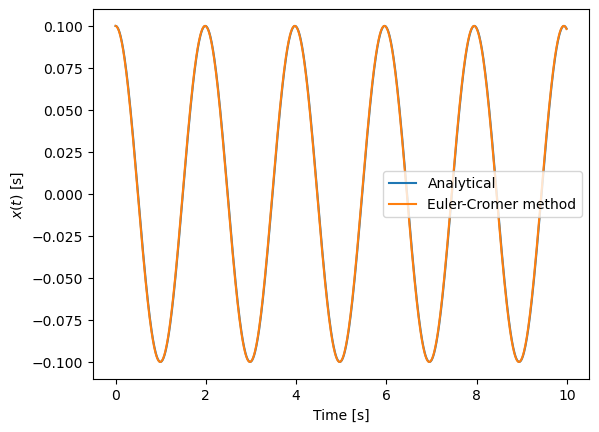

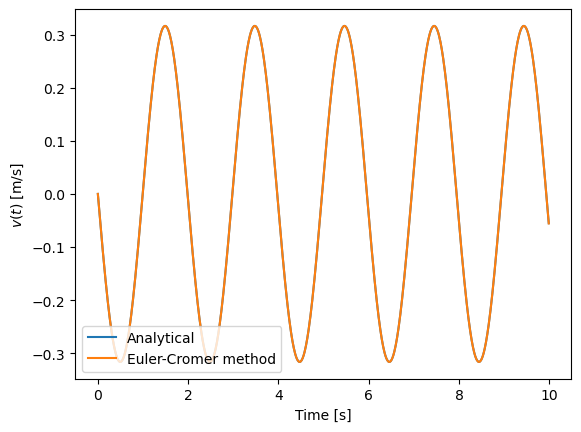

In [11]:
def Euler_Cromer(x0, k, m, tmax, dt):
## INSERT YOUR CODE HERE ##
    t = np.arange(0.0, tmax, dt)
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = x0
    
    for n in range(t.size-1):
        v[n+1] = v[n] - (k/m)*x[n]*dt
        x[n+1] = x[n] + v[n+1]*dt
    
    return t,x,v

# constants and intitial conditions
k = 1 # N/m
m = 0.1 # Kg
dt = 0.01 # s
tmax = 10 # s
x0 = 0.1 # m

t,x,v = Euler_Cromer(x0, k, m, tmax, dt)

plt.figure()
# Position vs time compared to analytical solution
plt.plot(t, x0*np.cos(np.sqrt(k/m)*t), label='Analytical')
plt.plot(t, x, label='Euler-Cromer method')
plt.xlabel('Time [s]')
plt.ylabel(r'$x(t)$ [s]')
plt.legend()

# Velocity vs time compared to analytical solution
plt.figure()
plt.plot(t, -x0*np.sqrt(k/m)*np.sin(np.sqrt(k/m)*t), label='Analytical')
plt.plot(t, v, label='Euler-Cromer method')
plt.legend(loc='lower left')
plt.xlabel('Time [s]')
plt.ylabel(r'$v(t)$ [m/s]')

## A better fix - the Verlet method
So far, we have solved simple second order differential equations of the form

\begin{equation}
    \frac{d^2 x(t}{dt^2} = g(x,t)
\end{equation}

by converting them into two first order equations

\begin{align}
    \frac{dx}{dt} &= v \\
    \\
    \frac{dv}{dt} &= g(x,t).
\end{align}

However, we can use other methods to directly solve the second order differential equation. One such method is known as Verlet (first described in application to molecular dynamics). In the Verlet method we start by combining two Taylor expansions of our function (forward and backwards in time)

\begin{align}
    x(t + \Delta t) &= x(t) + \frac{dx}{dt}\Delta t + \frac{1}{2}\frac{d^2x}{dt^2}(\Delta t)^2 + \frac{1}{6}\frac{d^3x}{dt^3}(\Delta t)^3 + \dots \\
    x(t - \Delta t) &= x(t) - \frac{dx}{dt}\Delta t + \frac{1}{2}\frac{d^2x}{dt^2}(\Delta t)^2 - \frac{1}{6}\frac{d^3x}{dt^3}(\Delta t)^3 + \dots
\end{align}

Let's write this into a more familiar form using the velocity ($v$) and acceleration ($a$):

\begin{align}
    x(t + \Delta t) &= x(t) + v(t)\Delta t + \frac{1}{2}a(t)(\Delta t)^2 + \frac{1}{6}\frac{d^3x}{dt^3}(\Delta t)^3 + \dots \\
    x(t - \Delta t) &= x(t) - v(t)\Delta t + \frac{1}{2}a(t)(\Delta t)^2 - \frac{1}{6}\frac{d^3x}{dt^3}(\Delta t)^3 + \dots
\end{align}

By combining theses two expansions, we can cancel out the first and third order terms to obtain an expression for $f(t + \Delta t)$ based on the values of two previous time steps

\begin{equation}
    x(t + \Delta t) \approx 2x(t) - x(t - \Delta t) + a(t)(\Delta t)^2
\end{equation}

with an overall error of order $O([\Delta t]^4)$. Note that $a(t)=-\frac{k}{m}x(t)$, so we can write our equation as

\begin{equation}
    x(t + \Delta t) \approx 2x(t) - x(t - \Delta t) -\frac{k}{m}x(t)(\Delta t)^2
\end{equation}

The equation above in discrete form becomes

\begin{equation}
    x_{n+1} = 2x_n - x_{n-1} -\frac{k}{m}x_n(\Delta t)^2.
\end{equation}

Notice that for this method we do not need to compute the velocity (i.e., the first order derivative) to iteratively find the subsequent solutions. While this method does not directly return the velocity, one can readily use the central difference to calculate this quantity

\begin{align}
    v(t) &= \frac{dx(t)}{dt} \approx \frac{x(t+\Delta t) - x(t- \Delta t)}{2\Delta t}\\
    \\
    v_{n} &= \frac{(x_{n+1} - x_{n-1})}{2\Delta t}
\end{align}

with an overall error of order $O([\Delta t]^2)$.

One minor problem with the Verlet method is that it is not self-starting because we need two previous time points to calculate the current value. We can overcome this by computing the values for the first iteration using the Euler-Cromer method

\begin{align}
     v_1 &= v_0 - \frac{k}{m} x_0 \Delta t \\
     \\
     x_1 &= x_0 + v_1 \Delta t.
\end{align}

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Define a function that uses the Verlet method to more accurately integrate the equations of motion for the small angle approximation. In order to use Verlet's method, you will need to calculate the first time step using the Euler-Cromer method. Compare the numerical solution from the Verlet method to the Euler-Cromer method and the analytical result.
</div>

Text(0, 0.5, '$v(t)$ [m/s]')

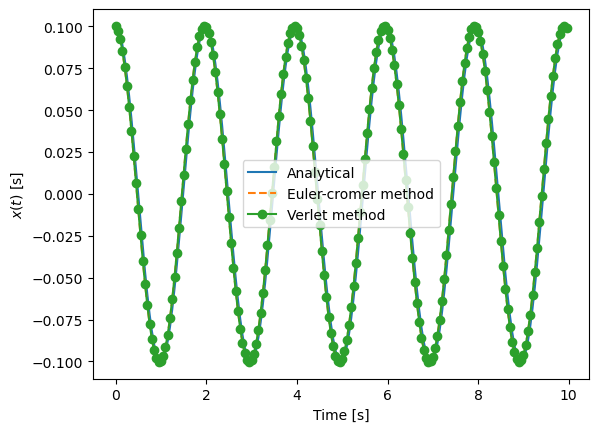

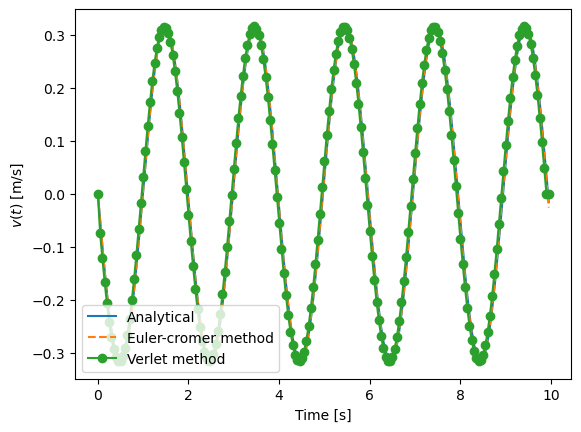

In [18]:
def Verlet(x0, k, m, tmax, dt):
    t = np.arange(0.0, tmax, dt)
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = x0
    
    # Use Euler-Cromer method to find the solution for the first time step
    v[1] = v[0] -(k/m)*x[0]*dt
    x[1] = x[0] + v[1]*dt

    # Use Verlet method to solve our equations from step 2 on
    for n in range(1,t.size-1):
        x[n+1] = 2*x[n] - x[n-1] - (k/m)*x[n]*dt**2
        v[n] = (x[n+1] - x[n-1])/(2.0*dt)
        
    return t,x,v

# constants and intitial conditions
k = 1 # N/m
m = 0.1 # Kg
dt = 0.05 # s
tmax = 10 # s
x0 = 0.1 # m

t,xEC,vEC = Euler_Cromer(x0, k, m, tmax, dt)
t,xVT,vVT = Verlet(x0, k, m, tmax, dt)

plt.figure()
# Position vs time compared to analytical solution
plt.plot(t, x0*np.cos(np.sqrt(k/m)*t), label='Analytical')
plt.plot(t, xEC, ls='--', label='Euler-cromer method')
plt.plot(t, xVT, marker='o', label='Verlet method')
plt.xlabel('Time [s]')
plt.ylabel(r'$x(t)$ [s]')
plt.legend()

# Velocity vs time compared to analytical solution
plt.figure()
plt.plot(t, -x0*np.sqrt(k/m)*np.sin(np.sqrt(k/m)*t), label='Analytical')
plt.plot(t, vEC, ls='--', label='Euler-cromer method')
plt.plot(t, vVT, marker='o', label='Verlet method')
plt.legend(loc='lower left')
plt.xlabel('Time [s]')
plt.ylabel(r'$v(t)$ [m/s]')

The solution of the Verlet algorithm appears very similar to the Euler-Cromer method as far as the positions and velocities of the system. What about the energy?

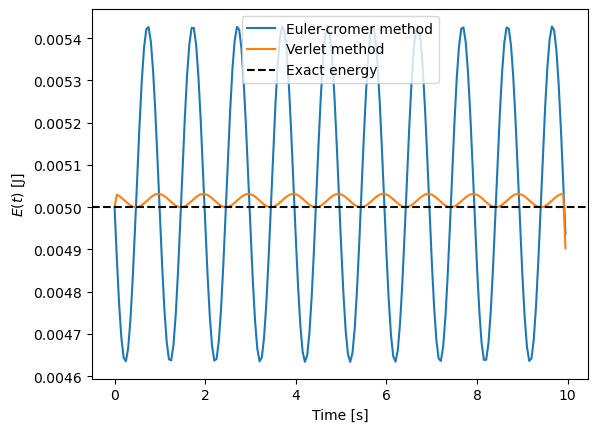

In [23]:
plt.figure()
# Position vs time compared to analytical solution
plt.plot(t, energy(xEC,vEC,k,m), label='Euler-Cromer method')
plt.plot(t, energy(xVT,vVT,k,m), label='Verlet method')
plt.axhline(y=0.5*k*x0**2, color='k', ls='--', label='Exact energy')
plt.xlabel('Time [s]')
plt.ylabel(r'$E(t)$ [J]')
plt.legend()

### Energy is much better conserved when using the Verlet algorithm vs. Euler-Cromer for the same $\Delta t$.